In [103]:
# Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [7]:
# Load your local housing.csv dataset
df1 = pd.read_csv("housing.csv")


In [9]:
df1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [15]:
df1.shape

(545, 13)

In [19]:
df1.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [33]:
df1.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [35]:
categorical_cols = df1.select_dtypes(include='object').columns.tolist()

In [37]:
df1_encoded = df1.copy()
for col in categorical_cols:
    df1_encoded[col] = df1_encoded[col].astype(str)
    df1_encoded[col] = LabelEncoder().fit_transform(df1_encoded[col])


In [39]:
# Separate features and target
X1 = df1_encoded.drop("price", axis=1)
y1 = df1_encoded["price"]


In [41]:
# Standardize features
scaler1 = StandardScaler()
X1_scaled = scaler1.fit_transform(X1)


In [43]:
# Train-test split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_scaled, y1, test_size=0.2, random_state=0)


#### dataset 2 (INSURANCE.csv)

In [47]:
df2 = pd.read_csv("insurance.csv")

In [49]:
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [51]:
df2.shape

(1338, 7)

In [53]:
df2.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [55]:
df2.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [58]:
# Automatically detect and encode categorical columns
categorical_cols2 = df2.select_dtypes(include='object').columns.tolist()

In [60]:
df2_encoded = df2.copy()
for col in categorical_cols2:
    df2_encoded[col] = df2_encoded[col].astype(str)
    df2_encoded[col] = LabelEncoder().fit_transform(df2_encoded[col])


In [62]:
# Separate features and target
X2 = df2_encoded.drop("charges", axis=1)
y2 = df2_encoded["charges"]

In [64]:
# Standardize features
scaler2 = StandardScaler()
X2_scaled = scaler2.fit_transform(X2)


In [66]:
# Train-test split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y2, test_size=0.2, random_state=0)


### Training Models Separately

In [76]:
# Prepare trained models separately
trained_models_housing = {}
trained_models_insurance = {}

In [79]:
poly = PolynomialFeatures(degree=2)
X1_poly_train = poly.fit_transform(X1_train)
X1_poly_test = poly.transform(X1_test)
X2_poly_train = poly.fit_transform(X2_train)
X2_poly_test = poly.transform(X2_test)

In [91]:
# Define Gaussian Process kernel
kernel = C(1.0) * RBF(length_scale=1.0)

# Train all models for housing dataset
trained_models_housing["Linear Regression"] = LinearRegression().fit(X1_train, y1_train)
trained_models_housing["Polynomial Regression"] = LinearRegression().fit(X1_poly_train, y1_train)
trained_models_housing["RANSAC"] = RANSACRegressor().fit(X1_train, y1_train)
trained_models_housing["Decision Tree"] = DecisionTreeRegressor(random_state=0).fit(X1_train, y1_train)
trained_models_housing["Random Forest"] = RandomForestRegressor(random_state=0).fit(X1_train, y1_train)
trained_models_housing["Gaussian Process"] = GaussianProcessRegressor(kernel=kernel).fit(X1_train, y1_train)
trained_models_housing["SVR"] = SVR().fit(X1_train, y1_train)

C:\Users\ssttg\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


In [93]:
# Train all models for insurance dataset
trained_models_insurance["Linear Regression"] = LinearRegression().fit(X2_train, y2_train)
trained_models_insurance["Polynomial Regression"] = LinearRegression().fit(X2_poly_train, y2_train)
trained_models_insurance["RANSAC"] = RANSACRegressor().fit(X2_train, y2_train)
trained_models_insurance["Decision Tree"] = DecisionTreeRegressor(random_state=0).fit(X2_train, y2_train)
trained_models_insurance["Random Forest"] = RandomForestRegressor(random_state=0).fit(X2_train, y2_train)
trained_models_insurance["Gaussian Process"] = GaussianProcessRegressor(kernel=kernel).fit(X2_train, y2_train)
trained_models_insurance["SVR"] = SVR().fit(X2_train, y2_train)

C:\Users\ssttg\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\ssttg\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


In [105]:
# Evaluation function
def evaluate_trained_models(models_dict, X_test, y_test, dataset_name, is_poly=False, X_poly_test=None):
    results = {}
    for name, model in models_dict.items():
        try:
            if name == "Polynomial Regression" and is_poly:
                y_pred = model.predict(X_poly_test)
            else:
                y_pred = model.predict(X_test)

            mse = mean_squared_error(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            accuracy = 100 - np.mean(np.abs((y_test - y_pred) / y_test)) * 100

            results[name] = {"MSE": mse, "MAE": mae, "R2": r2, "Accuracy(%)": accuracy}
        except Exception as e:
            print(f"Model {name} failed to predict: {e}")

    result_df = pd.DataFrame(results).T.reset_index().rename(columns={"index": "Model"})
    print(f"\nResults for {dataset_name} Dataset:")
    print(result_df)

    # Visualization
    plt.figure(figsize=(14, 6))
    sns.barplot(x="Model", y="R2", data=result_df)
    plt.title(f"Model Comparison (R2 Score) - {dataset_name}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 6))
    sns.barplot(x="Model", y="Accuracy(%)", data=result_df)
    plt.title(f"Model Comparison (Accuracy) - {dataset_name}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return result_df


Results for Housing Prices Dataset:
                   Model           MSE           MAE        R2  Accuracy(%)
0      Linear Regression  9.860418e+11  7.165834e+05  0.657805    83.957159
1  Polynomial Regression  1.540660e+12  8.313630e+05  0.465330    81.687147
2                 RANSAC  1.154179e+12  7.421614e+05  0.599455    83.911751
3          Decision Tree  2.668704e+12  1.117142e+06  0.073855    75.014265
4          Random Forest  1.238901e+12  8.236959e+05  0.570053    81.805779
5       Gaussian Process  2.509010e+13  4.694142e+06 -7.707251     0.880344
6                    SVR  3.000212e+12  1.259216e+06 -0.041191    72.899081


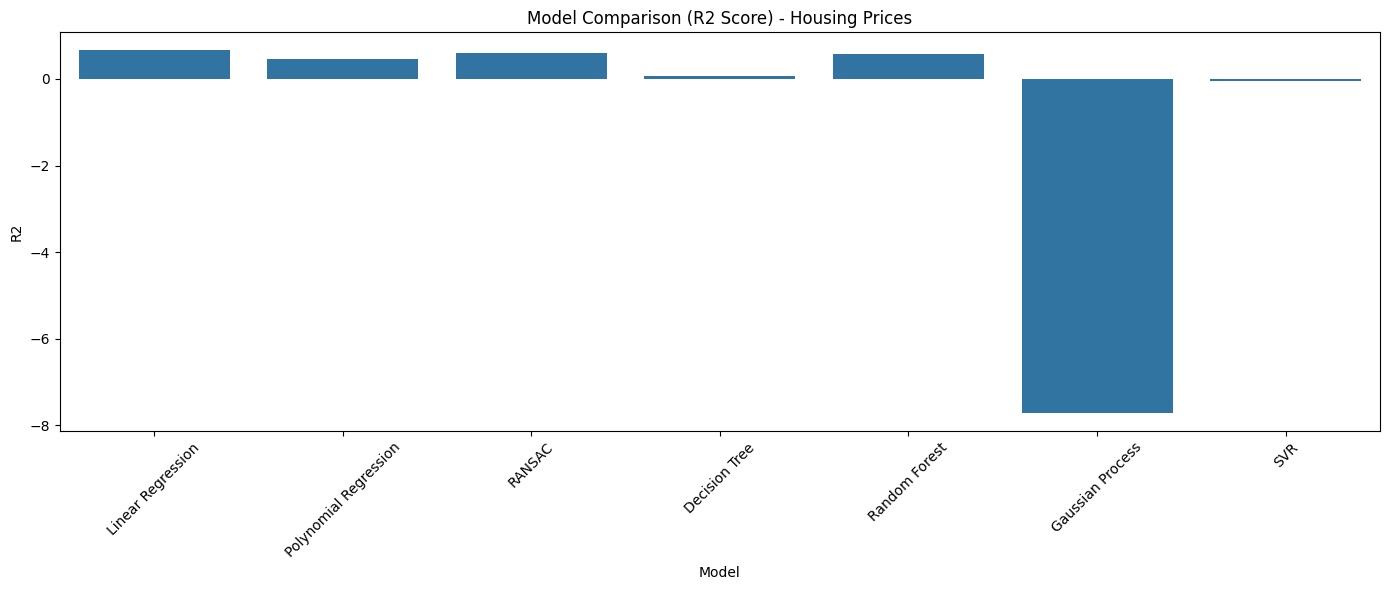

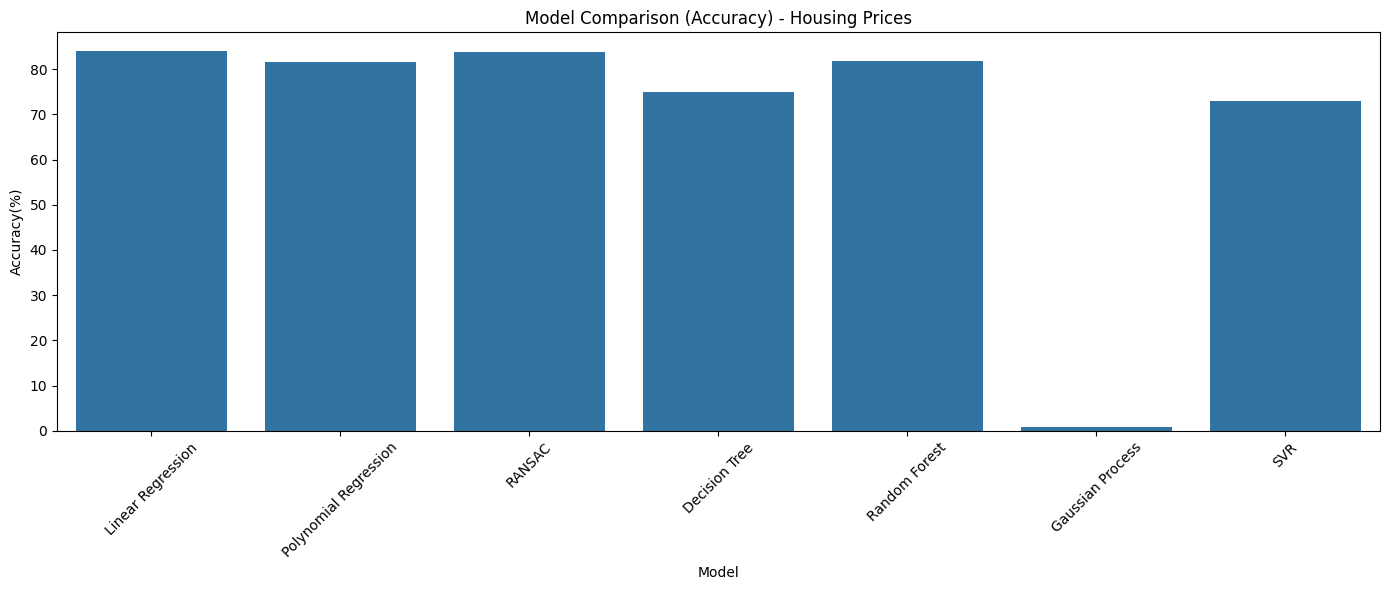

In [107]:
results1 = evaluate_trained_models(trained_models_housing, X1_test, y1_test, "Housing Prices", is_poly=True, X_poly_test=X1_poly_test)



Results for Insurance Charges Dataset:
                   Model           MSE           MAE        R2  Accuracy(%)
0      Linear Regression  3.184593e+07   3930.333274  0.799875    60.203198
1  Polynomial Regression  1.888594e+07   2913.241337  0.881318    68.657760
2                 RANSAC  4.586726e+07   3097.706715  0.711762    80.411911
3          Decision Tree  5.733316e+07   3683.795844  0.639709    51.707380
4          Random Forest  2.062753e+07   2701.278627  0.870373    63.885153
5       Gaussian Process  3.426476e+08  13546.866384 -1.153256     0.000000
6                    SVR  1.751436e+08   8574.842593 -0.100632     1.983730


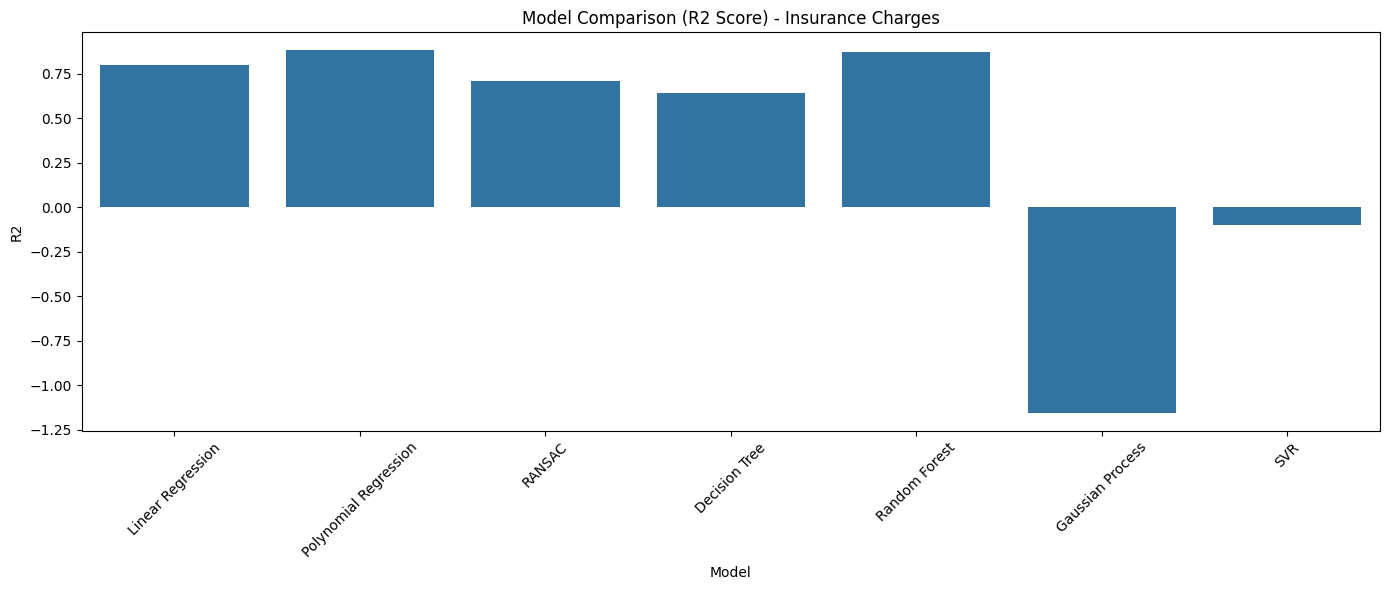

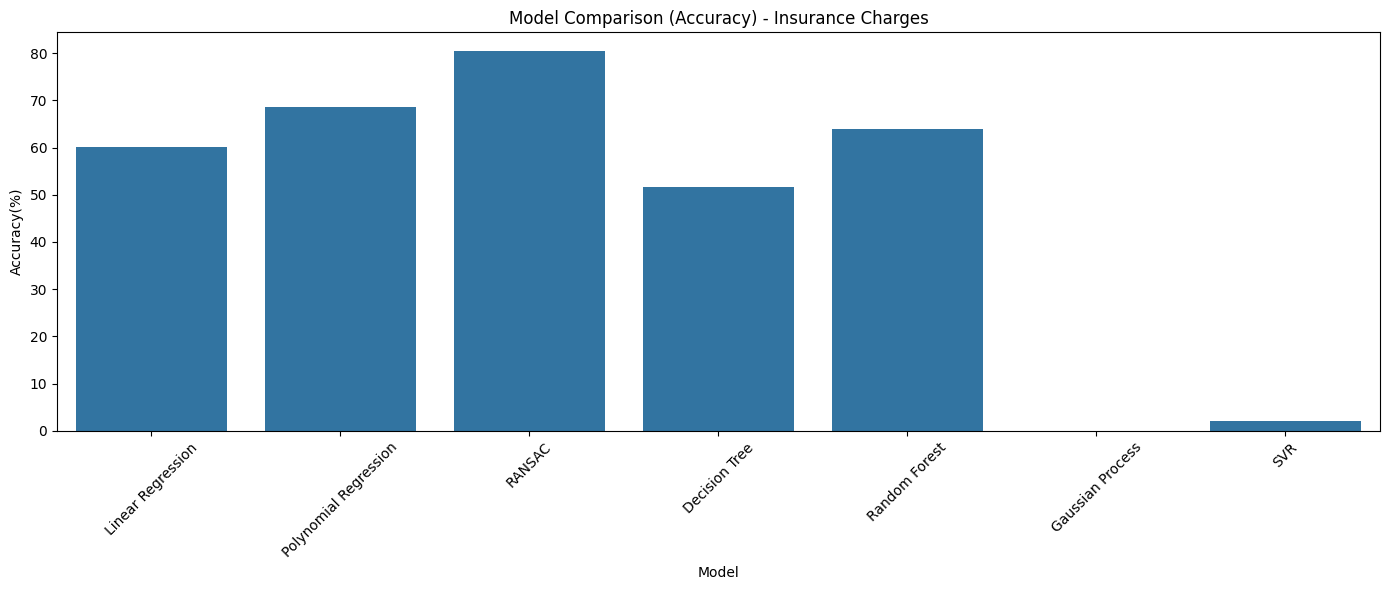

In [109]:
results2 = evaluate_trained_models(trained_models_insurance, X2_test, y2_test, "Insurance Charges", is_poly=True, X_poly_test=X2_poly_test)
